In [1]:
# Import storiks.plot
import storiks.plot as plot
import re
import pandas as pd
# Load default options
options = plot.Options()

## 1. System Setup

In [18]:
!cat setup.txt

Linux alange-ms05 5.11.0-40-generic #44~20.04.2-Ubuntu SMP Tue Oct 26 18:07:44 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux

Samsung 970 EVO 500GB (Over provision 30%)

Device         Boot     Start       End   Sectors   Size Id Type
/dev/nvme0n1p1           2048 683673599 683671552   326G 83 Linux
/dev/nvme0n1p2      683673600 976773167 293099568 139,8G  0 Empty

/dev/nvme0n1p1 on /media/auto/s970evo500oe type ext4 (rw,relatime)

Filesystem     Type  Size  Used Avail Use% Mounted on
/dev/nvme0n1p1 ext4  320G   86G  219G  29% /media/auto/s970evo500oe


## 2. Steady State Performance

### 2a. YCSB workloads A and B

File Name                      : Label
--------------------------------------------------
./exp_01-ycsb_workloada.out.xz : YCSB A
./exp_01-ycsb_workloadb.out.xz : YCSB B


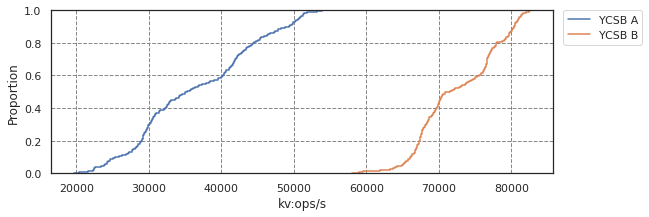

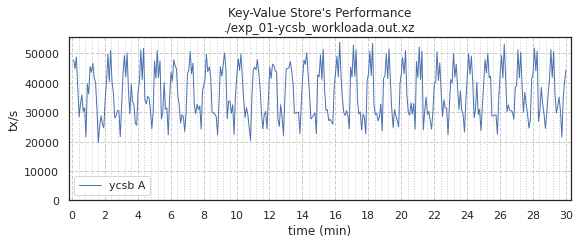

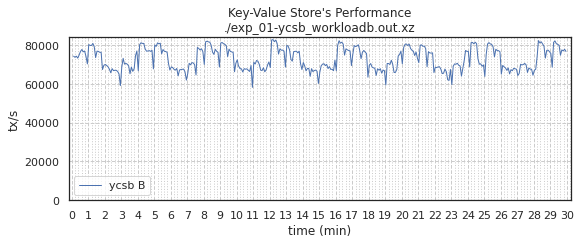

In [2]:
# Load steady-state experiment files (exp_01*)
af1_ycsb = plot.AllFiles(
    'exp_01-ycsb',
    options,
    plot.getFiles('.', str_filter='exp_01-ycsb'))
af1_ycsb.print_files()
# Plot the CDF of the database performance
af1_ycsb.graph_ecdf()
# Database telemetry
for f in af1_ycsb: f.graph_db()

### 2b. Access_time3 Executed Alone

#### iodepth2

File Name                           : Label
-------------------------------------------------------
./exp_01-iodepth2_ds0bs4wr00.out.xz : bs4,wr=0.0
./exp_01-iodepth2_ds0bs4wr01.out.xz : bs4,wr=0.1
./exp_01-iodepth2_ds0bs4wr05.out.xz : bs4,wr=0.5
./exp_01-iodepth2_ds0bs4wr09.out.xz : bs4,wr=0.9
./exp_01-iodepth2_ds0bs4wr10.out.xz : bs4,wr=1.0


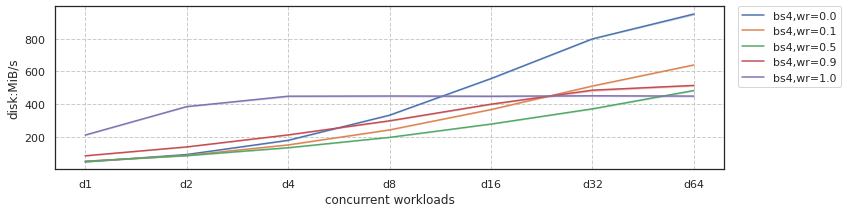

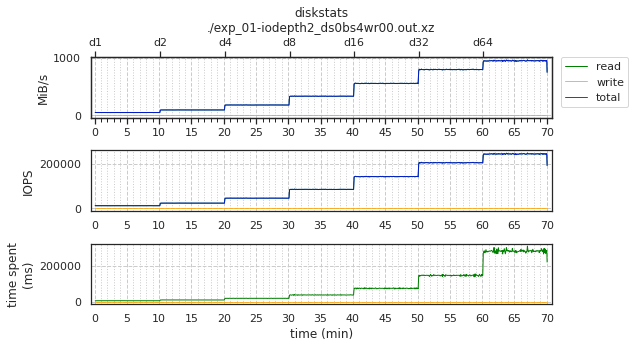

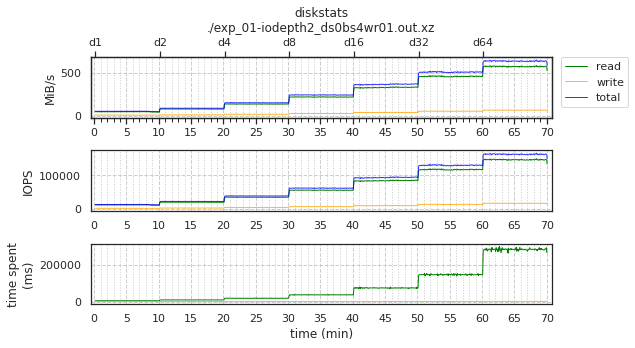

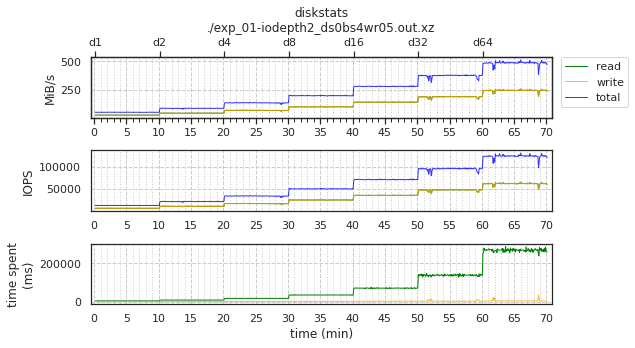

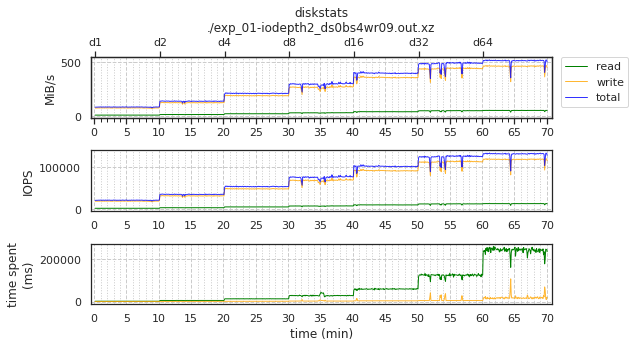

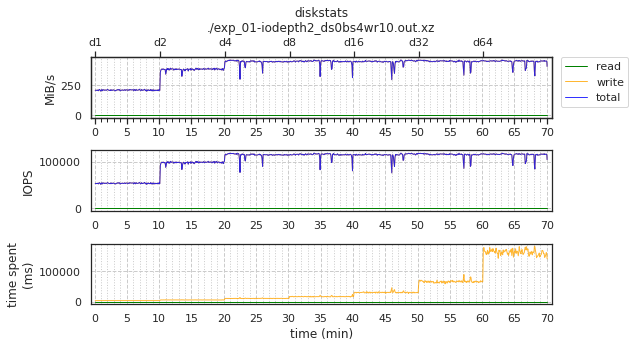

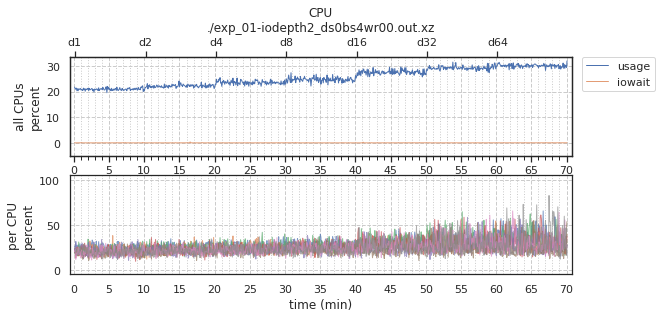

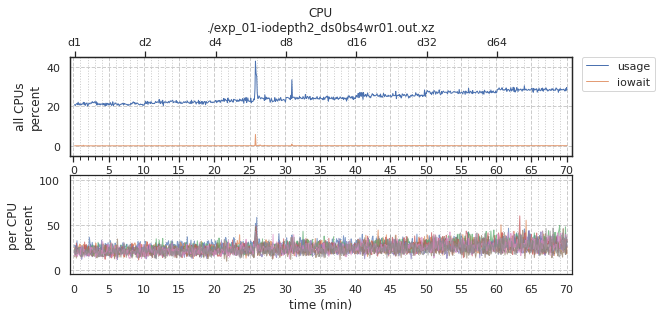

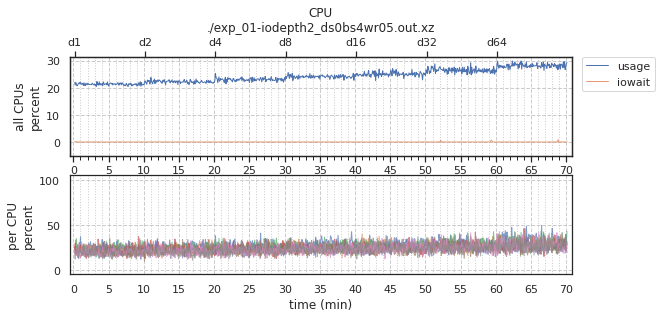

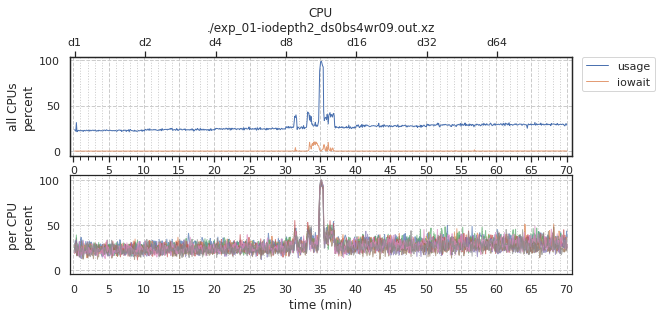

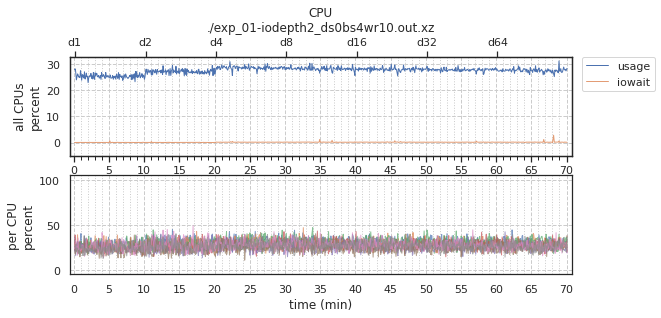

In [3]:
af1_at3ds0 = plot.AllFiles(
    'exp_01-iodepth2_ds0',
    options(w_labels=[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('', str_filter='exp_01-iodepth2_ds0bs'))
af1_at3ds0.print_files()
af1_at3ds0.graph_io_w()
for f in af1_at3ds0: f.graph_io()
for f in af1_at3ds0: f.graph_cpu()

In [4]:
af1_at3ds0_data = None
for f in af1_at3ds0:
    df = f.pd_data.groupby(['w', 'w_name'], as_index=False).agg({'access_time3[0].total_MiB/s':'mean'})
    df = df.rename(columns={'access_time3[0].total_MiB/s':f'{f.file_label}(MiB/s)'})
    af1_at3ds0_data = df if af1_at3ds0_data is None else \
               pd.merge(af1_at3ds0_data, df, how='inner', on=['w', 'w_name'])
af1_at3ds0_data

,w,w_name,"bs4,wr=0.0(MiB/s)","bs4,wr=0.1(MiB/s)","bs4,wr=0.5(MiB/s)","bs4,wr=0.9(MiB/s)","bs4,wr=1.0(MiB/s)"
0,0,d1,46.342083,49.637563,50.080000,83.572605,210.237917
1,1,d2,91.336723,85.775966,84.430336,137.838487,384.445210
2,2,d4,178.111933,150.053866,132.811008,211.243866,447.827563
3,3,d8,331.767143,241.830588,196.216891,297.077395,449.142689
4,4,d16,555.691933,366.139160,277.554622,398.983361,447.509076
5,5,d32,798.451849,510.190084,370.771681,484.617143,450.246975
6,6,d64,952.027966,639.588655,483.050588,513.919664,448.938235


File Name                           : Label
-------------------------------------------------------
./exp_01-iodepth2_ds1bs4wr00.out.xz : bs4,wr=0.0
./exp_01-iodepth2_ds1bs4wr01.out.xz : bs4,wr=0.1
./exp_01-iodepth2_ds1bs4wr05.out.xz : bs4,wr=0.5
./exp_01-iodepth2_ds1bs4wr09.out.xz : bs4,wr=0.9
./exp_01-iodepth2_ds1bs4wr10.out.xz : bs4,wr=1.0


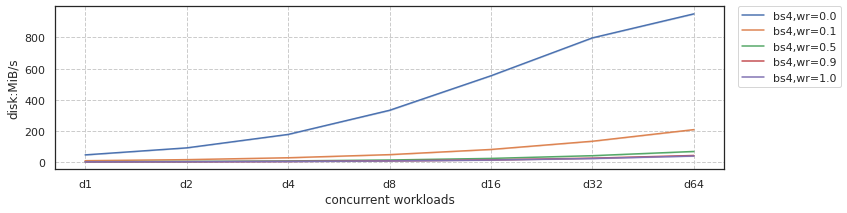

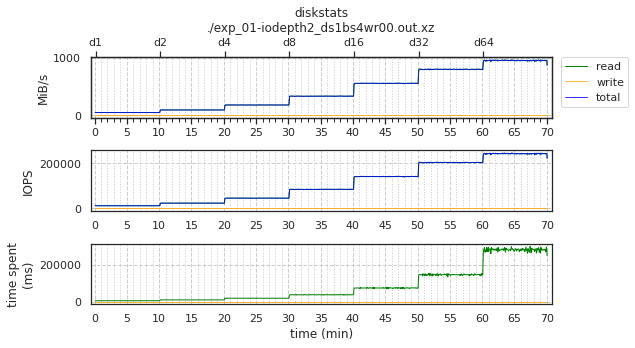

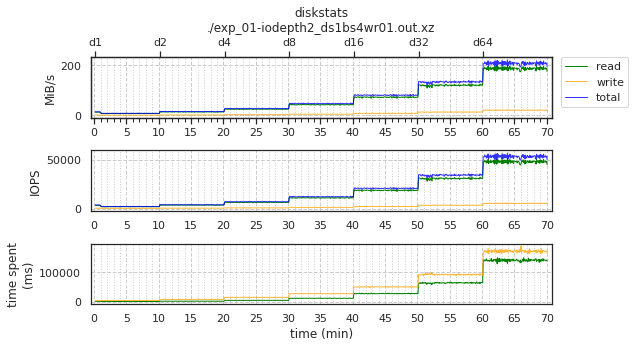

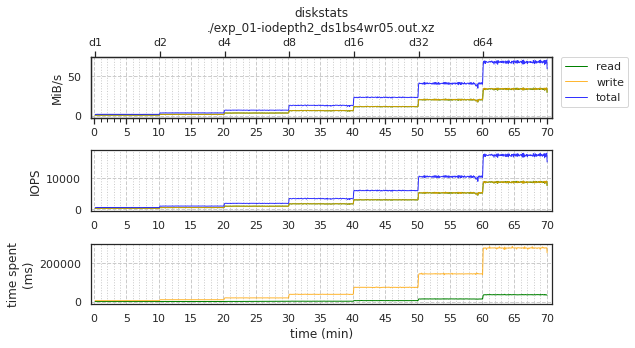

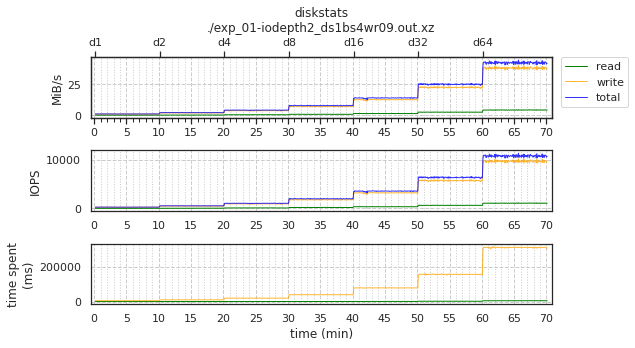

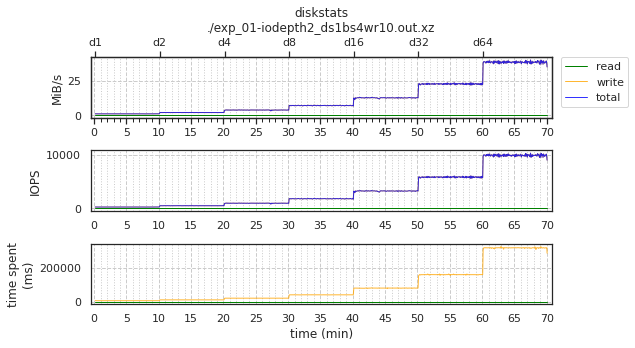

In [12]:
af1_at3ds1 = plot.AllFiles(
    'exp_01-iodepth2_ds1bs',
    options(w_labels=[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('', str_filter='exp_01-iodepth2_ds1bs'))
af1_at3ds1.print_files()
af1_at3ds1.graph_io_w()
for f in af1_at3ds1: f.graph_io()
# for f in af1_at3ds1: f.graph_cpu()

In [6]:
af1_at3ds1_data = None
for f in af1_at3ds1:
    df = f.pd_data.groupby(['w', 'w_name'], as_index=False).agg({'access_time3[0].total_MiB/s':'mean'})
    df = df.rename(columns={'access_time3[0].total_MiB/s':f'{f.file_label}(MiB/s)'})
    af1_at3ds1_data = df if af1_at3ds1_data is None else \
               pd.merge(af1_at3ds1_data, df, how='inner', on=['w', 'w_name'])
af1_at3ds1_data

,w,w_name,"bs4,wr=0.0(MiB/s)","bs4,wr=0.1(MiB/s)","bs4,wr=0.5(MiB/s)","bs4,wr=0.9(MiB/s)","bs4,wr=1.0(MiB/s)"
0,0,d1,45.938235,8.679160,1.888655,1.072185,0.969580
1,1,d2,90.928824,15.353697,3.732101,2.128067,1.921345
2,2,d4,177.199412,27.506303,7.167059,4.127059,3.735294
3,3,d8,330.328908,47.497143,13.160924,7.794454,7.023025
4,4,d16,553.663109,80.742689,23.355798,13.914202,12.618067
5,5,d32,797.057731,133.507983,40.816050,24.923529,22.748908
6,6,d64,951.863361,208.254370,68.031176,42.204286,38.595798


## 2. Pressure Scale (iodepth2)

* For each YCSB workload X in (A, B):
    * For write ratio (wr) from 0 to 1:
        * 1 YCSB workload X
        * 1 access_time3 with the specified wr increasing iodepth from 1 to 64 (d1 to d64).
          *(random ratio (rr) is 1 for all experiments)*

File Name                                          : Label
----------------------------------------------------------------------
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr00.out.xz : YCSB A; wr0.0
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr01.out.xz : YCSB A; wr0.1
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr05.out.xz : YCSB A; wr0.5
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr09.out.xz : YCSB A; wr0.9
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr10.out.xz : YCSB A; wr1.0
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr00.out.xz : YCSB B; wr0.0
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr01.out.xz : YCSB B; wr0.1
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr05.out.xz : YCSB B; wr0.5
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr09.out.xz : YCSB B; wr0.9
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr10.out.xz : YCSB B; wr1.0


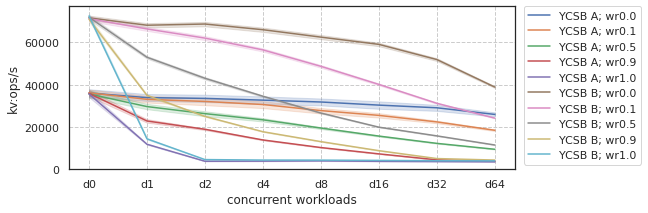

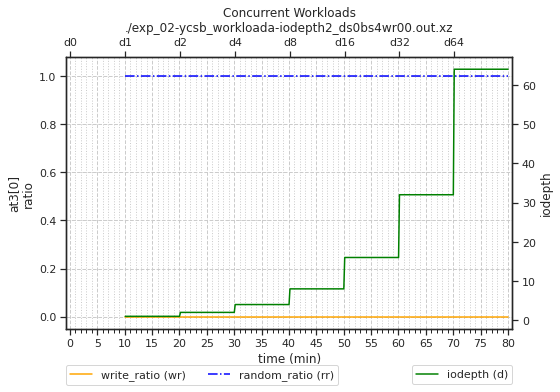

In [7]:
af2_ds0 = plot.AllFiles(
    'exp_02-ycsb-iodepth2_ds0',
    options(w_labels=['d0']+[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('.', list_filter=['exp_02-ycsb', 'iodepth2_ds0']))
af2_ds0.print_files()
af2_ds0.graph_dbmean()
#af3.graph_pressure()
if len(af2_ds0) > 0: af2_ds0[0].graph_at3_script()

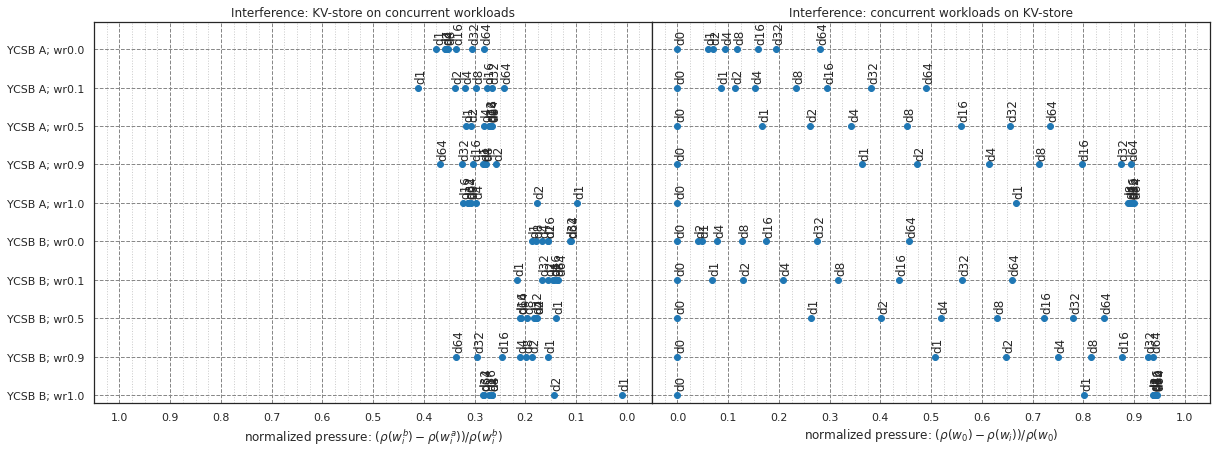

In [8]:
for f in af2_ds0:
    r = re.findall(r'iodepth2_([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af1_at3ds0:
            r2 = re.findall(r'iodepth2_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

af2_ds0.graph_join_pressure()

File Name                                          : Label
----------------------------------------------------------------------
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr00.out.xz : YCSB A; wr0.0
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr01.out.xz : YCSB A; wr0.1
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr05.out.xz : YCSB A; wr0.5
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr09.out.xz : YCSB A; wr0.9
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr10.out.xz : YCSB A; wr1.0
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr00.out.xz : YCSB B; wr0.0
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr01.out.xz : YCSB B; wr0.1
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr05.out.xz : YCSB B; wr0.5
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr09.out.xz : YCSB B; wr0.9
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr10.out.xz : YCSB B; wr1.0


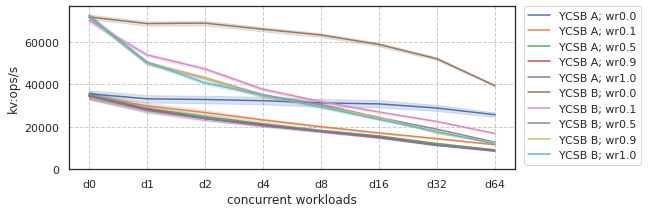

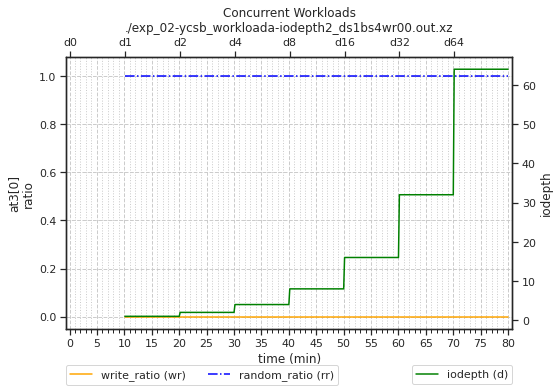

In [9]:
af2_ds1 = plot.AllFiles(
    'exp_02-ycsb-iodepth2_ds1',
    options(w_labels=['d0']+[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('.', list_filter=['exp_02-ycsb', 'iodepth2_ds1']))
af2_ds1.print_files()
af2_ds1.graph_dbmean()
#af2_ds1.graph_pressure()
if len(af2_ds1) > 0: af2_ds1[0].graph_at3_script()

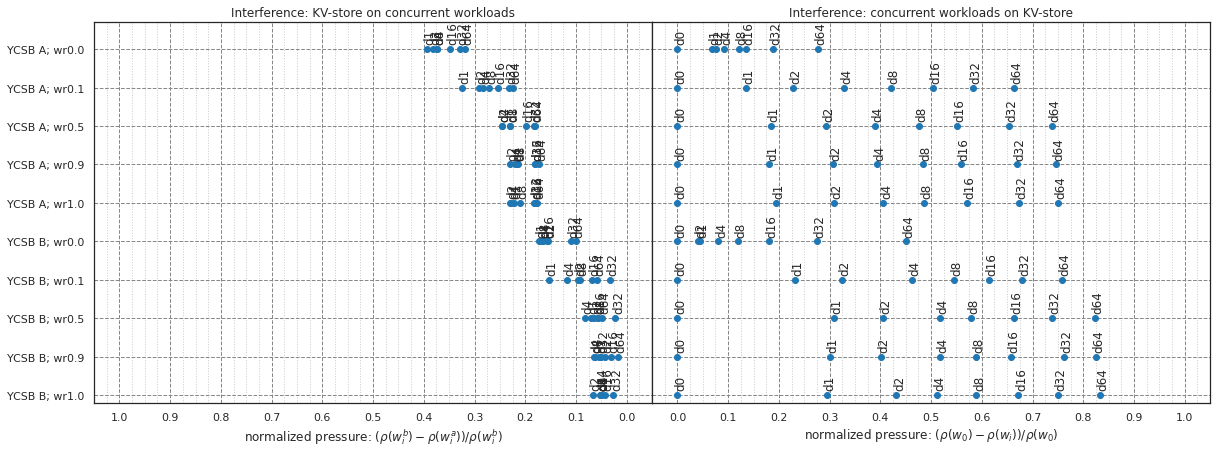

In [10]:
for f in af2_ds1:
    r = re.findall(r'iodepth2_([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af1_at3ds1:
            r2 = re.findall(r'iodepth2_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

af2_ds1.graph_join_pressure()

In [13]:
# for f in af2_ds0 + af2_ds1: f.graph_db()
# for f in af2_ds0 + af2_ds1: f.graph_pressure()
# for f in af2_ds0 + af2_ds1: f.graph_cpu()
# for f in af2_ds0: f.graph_io()
# for f in af2_ds1: f.graph_io()
# for f in af2_ds0 + af2_ds1: f.graph_db_summary()